![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [4]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [5]:
# Celda 1.1
print(bikes.groupby('workingday').total.mean())
print(bikes.groupby('workingday').total.median())
print(bikes.groupby('workingday').total.min())
print(bikes.groupby('workingday').total.max())

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64
workingday
0    128.0
1    151.0
Name: total, dtype: float64
workingday
0    1
1    1
Name: total, dtype: int64
workingday
0    783
1    977
Name: total, dtype: int64


Los días hábiles se rentan más bicicletas que los fines de semana o festivos, esto indica que el servicio de alquiler de bicicletas es más usado con fines laborales que de esparcimiento.

Text(0.5, 1.0, 'Total bikes per hour')

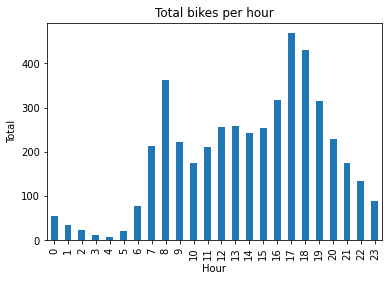

In [6]:
# Celda 1.2
bikes.groupby('hour').total.mean()
plot = bikes.groupby('hour').total.mean().plot(kind='bar')
plot.set_xlabel('Hour')
plot.set_ylabel('Total')
plot.set_title('Total bikes per hour')

Hay dos momentos donde se rentan más biciclietas en el día, entre las 7 y 9 am, y entre las 4 y 6 pm, esto confirma que el servicio de alquiler de bicicletas esta siendo más usado como un medio para ir y volver del trabajo que como un medio de esparcimiento.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

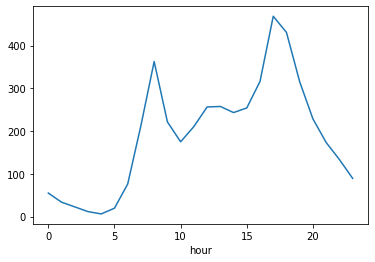

In [7]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

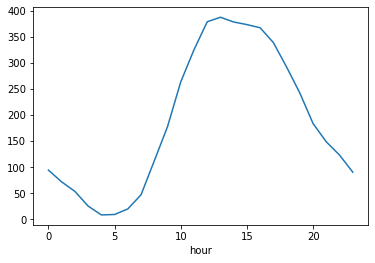

In [8]:
# Celda 2.2 - "workingday"=0 escriba su código y hallazgos 
bikes[bikes.workingday==0].groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

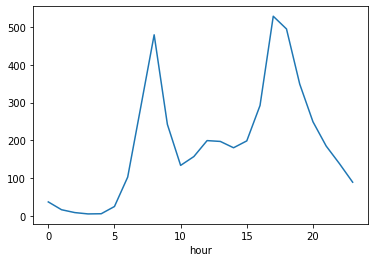

In [9]:
# Celda 2.3 - "workingday"=1 escriba su código y hallazgos 
bikes[bikes.workingday==1].groupby('hour').total.mean().plot()

En los días laborales se rentan bicicletas para ir y volver del trabajo, en los fines de semana y festivos se rentan bicicletas para esparcimiento, por lo que se puede afirmar que pronosticar el número de bicicletas que se alquilarán en un día determinado debe estar relacionado con el tipo de día para lograr un mejor ajuste de los datos.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [10]:
# Celda 3
X = bikes[[ 'hour', 'workingday' ]]
y = bikes.total

reg = LinearRegression()
reg.fit(X, y)
print(reg.coef_)

[10.49206282  4.07248627]


* Por cada hora, el número de biciletas rentadas aumentará en 10.49.
* Los días laborales se alquilarán 4.07 más bicicletas que los fines de semana y festivos.

Las limitaciones de la rgresión lineal son que el modelo no es capaz de predecir el número de bicicletas que se alquilarán en un día determinado, ya que no hay una relación lineal entre el número de bicicletas y el número de horas porque en realidad el comportamiento presenta aumentos y disminuciones de la cantidad de bicicletas alquiladas en ciertas horas.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [47]:
# Celda 4
# Definición de parámetros y criterios de parada
max_depth = 6
num_pct = 10
max_features = None
min_gain=0.001


def ecm(y):
    return np.sum(np.power(y - y.mean(), 2)) / len(y)

def ecm_split(X_col, y, spli):
    filter_l = X_col < spli
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    return ecm(y_l), ecm(y_r)

def best_split(X, y, num_pct=10):    
    features = range(X.shape[1])    
    best_split = [0, 0, np.inf]  # j, split, ecm    
    
    for j in features:        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        for split in splits:
            ecm_l, ecm_r = ecm_split(X.iloc[:, j], y, split)            
            if ecm_l + ecm_r < best_split[2]:
                best_split = [j, split, ecm_l + ecm_r]
                
    return best_split
        
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    if X.shape[0] < 2:
        tree = dict(y_pred=y.mean(), level=level, split=-1, n_samples=1, gain=0)
        return np.mean(y)
    
    j, split, gain = best_split(X, y, num_pct)
    y_pred = y.mean()
    tree = dict(y_pred=y_pred, level=level, split=split, n_samples=X.shape[0], gain=gain)
    
    # Revisar el criterio de parada 
    if gain < min_gain or level == max_depth:
        return tree
    
    filter_l = X.iloc[:, j] < split
    X_l = X.loc[filter_l]
    y_l = y.loc[filter_l]
    X_r = X.loc[~filter_l]
    y_r = y.loc[~filter_l]  
    tree['split'] = [j, split]  
    
    tree['sl'] = tree_grow(X_l, y_l, level=level+1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level=level+1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)

    return tree

def tree_predict(X, tree):
    # print(len(tree))
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1 or tree['level'] == max_depth:        
            predicted = predicted * tree['y_pred']                  
    else:         
        # print(tree['split'])      
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'])
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'])
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'])
            predicted[~filter_l] = tree_predict(X_r, tree['sr'])

    return predicted


tree=tree_grow(X, y, max_depth=max_depth, min_gain=min_gain, num_pct=num_pct)
# print(tree['split'])
predictions = tree_predict(X, tree)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print(mean_squared_error(y, predictions))
print(mean_absolute_error(y, predictions))
print(r2_score(y, predictions))


18186.815409398252
90.07713630872293
0.44569796598138856


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de clasificación y compare desempeño con el modelo del punto 3.

In [52]:
# Celda 5
X = bikes[[ 'hour', 'workingday' ]]
y = bikes.total

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=9, min_samples_leaf=10)
tree.fit(X, y)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print(mean_squared_error(y, tree.predict(X)))
print(mean_absolute_error(y, tree.predict(X)))
print(r2_score(y, tree.predict(X)))


11329.31152387664
70.75790612519393
0.6547025809438785


El arbol manual y el arbol con librería son muy parecidos especialmente si calibro el arbol con librería con con una profundidad máxima de 3 nodos. Al aumentar la profundidad del arbol, el desempeño del modelo con librería mejora, llegando a bajar el error cuadratico medio a valores de 11329 y aumentar el r cuadrado hasta un 70%.

Personalmente me gustó mucho este ejercició por que me ayudó a comprender el funcionamiento interno de un arbol de regresión y la manera en que se construyen los nodos.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir la cantidad de reacciones en redes sociales (popularidad) de la notica. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [147]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [148]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [149]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [150]:
# Celda 6

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=30, min_samples_leaf=10)
tree.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print(accuracy_score(y_test, tree.predict(X_test)))
print(f1_score(y_test, tree.predict(X_test)))

# Logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
print(accuracy_score(y_test, logreg.predict(X_test)))
print(f1_score(y_test, logreg.predict(X_test)))

0.568
0.5615696887686061
0.6146666666666667
0.6115591397849462


El modelo de Árbol de decisión logra mayor rpecisión que la regresión logística.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

In [151]:
# Celda 7
np.random.seed(123)
X_test = X_test[X_train.columns]
print(X_train.shape)
print(X_test.shape)


n_samples = X_train.shape[0]
n_B = 100
n_estimators = n_B

samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]

from sklearn.tree import DecisionTreeClassifier

# Definición del modelo usando DecisionTreeClassifier de sklearn
treereg = DecisionTreeClassifier(max_depth=None, random_state=123)
treereg2 = DecisionTreeClassifier(max_depth=2, random_state=123)
logisticreg = LogisticRegression(C=1e5)

# DataFrame para guardar las predicciones de cada árbol
y_pred1 = pd.DataFrame(index=X_test.index, columns=[list(range(n_B))])
y_pred2 = pd.DataFrame(index=X_test.index, columns=[list(range(n_B))])
y_pred_log = pd.DataFrame(index=X_test.index, columns=[list(range(n_B))])

# Entrenamiento de un árbol sobre cada muestra boostrap y predicción sobre los datos de test
for i, sample in enumerate(samples):
    xtrain = X_train.iloc[sample]
    ytrain = y_train.iloc[sample]
    # print(xtrain)
    # print(ytrain)
    treereg.fit(xtrain, ytrain)
    X_test2 = X_test[xtrain.columns]
    y_pred1.iloc[:,i] = treereg.predict(X_test2)
    treereg2.fit(xtrain, ytrain)
    y_pred2.iloc[:,i] = treereg.predict(X_test2)
    logisticreg.fit(xtrain, ytrain)
    y_pred_log.iloc[:,i] = logisticreg.predict(X_test2)

y_pred_df = np.concatenate((y_pred1, y_pred2, y_pred_log), axis=1)
prediccion = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(np.int)

# Desempeño al hacer votación mayoritaria
from sklearn import metrics
print(metrics.f1_score(prediccion, y_test))
print(metrics.accuracy_score(prediccion, y_test))

(4500, 59)
(1500, 59)
0.6705099778270509
0.5046666666666667


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [162]:
# Celda 8
np.random.seed(123)
X_test = X_test[X_train.columns]
print(X_train.shape)
print(X_test.shape)


n_samples = X_train.shape[0]
n_B = 100
n_estimators = n_B

samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]

from sklearn.tree import DecisionTreeClassifier

# Definición del modelo usando DecisionTreeClassifier de sklearn
treereg = DecisionTreeClassifier(max_depth=None, random_state=123)
treereg2 = DecisionTreeClassifier(max_depth=2, random_state=123)
logisticreg = LogisticRegression(C=1e5)

# DataFrame para guardar las predicciones de cada árbol
y_pred1 = pd.DataFrame(index=X_test.index, columns=[list(range(n_B))])
y_pred2 = pd.DataFrame(index=X_test.index, columns=[list(range(n_B))])
y_pred_log = pd.DataFrame(index=X_test.index, columns=[list(range(n_B))])
errors = np.zeros(n_estimators*3)

# Entrenamiento de un árbol sobre cada muestra boostrap y predicción sobre los datos de test
for i, sample in enumerate(samples):
    xtrain = X_train.iloc[sample]
    ytrain = y_train.iloc[sample]
    # print(xtrain)
    # print(ytrain)
    treereg.fit(xtrain, ytrain)
    X_test2 = X_test[xtrain.columns]
    y_pred1.iloc[:,i] = treereg.predict(X_test2)
    treereg2.fit(xtrain, ytrain)
    y_pred2.iloc[:,i] = treereg.predict(X_test2)
    logisticreg.fit(xtrain, ytrain)
    y_pred_log.iloc[:,i] = logisticreg.predict(X_test2)

y_pred_df = np.concatenate((y_pred1, y_pred2, y_pred_log), axis=1)
for i in range(y_pred_df.shape[1]):
    errors[i] = 1 - metrics.accuracy_score(y_test, y_pred_df[:,i])
# print(errors)
alpha = (1 - errors) / (1 - errors).sum()
# print(len(alpha))
# print(y_pred_df.shape)
weighted_sum_1 = ((y_pred_df) * alpha).sum(axis=1)
prediccion = (weighted_sum_1 >= 0.5).astype(np.int)

# Desempeño al hacer votación mayoritaria
from sklearn import metrics
print(metrics.f1_score(prediccion, y_test))
print(metrics.accuracy_score(prediccion, y_test))

(4500, 59)
(1500, 59)
0.6222222222222222
0.626


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [163]:
# Celda 9
# La metodología de votación mayoritaria obtuvo mayor F1 score y pero menor accuracy mientras la 
# metodología de votación por peso obtuvo mayor accuracy y menor F1 score pero fue más consistente.
# Creo que la metodología de votación por peso es más consistente y es más eficiente al dar prioridad a
# los árboles que son más robustos.